<a href="https://colab.research.google.com/github/khaoula-oueslati/ConvMsa/blob/master/test_tech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SPAAG**

---


Cas Pratique : BUSINESS ANALYST




In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import timedelta
from sklearn.preprocessing import StandardScaler
### Kmeans
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from pandas import json_normalize

#  **Data**: **`Orders _ customers - anonymized`**

In [ ]:
# importation de Orders _ customers - anonymized
orders_customers_anonymised = pd.read_excel("/Orders _ customers - anonymized.xlsx")
orders_customers_anonymised.head()

,Name,Customer id,Financial Status,Paid at,Fulfillment Status,Fulfilled at,Accepts Marketing,Currency,Subtotal,Shipping,Taxes,Total,Discount Code,Discount Amount,Shipping Method,Created at,Lineitem quantity,Lineitem name,Lineitem price,Lineitem compare at price,Lineitem sku,Lineitem requires shipping,Lineitem taxable,Lineitem fulfillment status,Billing City,Shipping Province,Shipping Country,Notes,Note Attributes,Cancelled at,,Payment Reference,Refunded Amount,Vendor,Id,Tags,Risk Level,Source,Lineitem discount,Tax 1 Name,Tax 1 Value,Tax 2 Name,Tax 2 Value,Tax 3 Name,Tax 3 Value,Tax 4 Name,Tax 4 Value,Tax 5 Name,Tax 5 Value,Phone,Receipt Number,Duties,Payment Terms Name,Next Payment Due At
0,#14442,1,paid,2021-09-23 09:43:21 +0200,unfulfilled,NaN,yes,EUR,105.00,20.00,9.55,125.00,NaN,0.00,TNT express - 1/2 giorni,2021-09-23 09:43:20 +0200,1,Box Vitamina C,105.00,145.00,DPR-BOX-VITC,true,true,pending,PADENGHE SUL GARDA,BS,IT,NaN,date: 2021/09/28,NaN,PayPal Express Checkout,c23025176051900.1,0.00,Depuravita,4017620549820,NaN,Low,web,0.0,VAT 10%,9.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,#14441,,paid,2021-09-22 14:21:46 +0200,fulfilled,2021-09-22 15:02:22 +0200,no,EUR,2970.00,0.00,0.00,2970.00,Sconto personalizzato,5730.00,NaN,2021-09-22 14:21:45 +0200,60,Collagen Chocolate,55.00,NaN,CLGN-CHCLT,true,true,fulfilled,London,ENG,GB,NaN,date: 2021/08/31,NaN,manual,c23012107649212.1,0.00,Depuravita,4016061481148,NaN,Low,shopify_draft_order,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,#14441,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-22 14:21:45 +0200,60,Probiotic Chocolate,55.00,NaN,PRB-CHCLT,true,true,fulfilled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Depuravita,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,#14441,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-22 14:21:45 +0200,60,Strong Bite,35.00,NaN,DPR-WP-CHC,true,true,fulfilled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Depuravita,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,#14440,,paid,2021-09-22 11:33:54 +0200,fulfilled,2021-09-22 12:16:47 +0200,no,EUR,561.00,0.00,51.00,561.00,Sconto personalizzato,165.00,NaN,2021-09-22 11:33:52 +0200,15,Black Panther,4.90,NaN,DPR-BLPHTR-250,true,true,fulfilled,NaN,AG,IT,Fascia oraria di consegna 19-22,date: 2021/09/22,NaN,Stripe,c23010364096700.1,0.00,Depuravita,4015897772220,"compra_ora_paga_dopo_con_klarna, Klarna Payments",Low,shopify_draft_order,0.0,VAT 10%,51.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Description des données
orders_customers_anonymised.describe()

,Lineitem discount,Tax 1 Value,Tax 2 Value,Tax 4 Name,Tax 4 Value,Duties,Next Payment Due At
count,1.904800e+04,4329.000000,8.000000,0.0,2.000000e+00,0.0,0.0
mean,4.132438e+07,16.746415,23.432500,NaN,3.934129e+11,NaN,NaN
std,4.032781e+09,25.337251,20.663362,NaN,4.002880e+07,NaN,NaN
min,0.000000e+00,0.040000,7.420000,NaN,3.933846e+11,NaN,NaN
25%,0.000000e+00,7.090000,8.110000,NaN,3.933987e+11,NaN,NaN
50%,0.000000e+00,10.730000,14.755000,NaN,3.934129e+11,NaN,NaN
75%,0.000000e+00,16.500000,32.790000,NaN,3.934270e+11,NaN,NaN
max,3.936661e+11,405.000000,66.450000,NaN,3.934412e+11,NaN,NaN


In [ ]:
print("Data shape: {} row and {} column".format(orders_customers_anonymised.shape[0], orders_customers_anonymised.shape[1]))

Data shape: 19677 row and 54 column


## Analyse des valeurs manquantes

In [ ]:
#count  missing values per column
mv = orders_customers_anonymised.isnull().sum()
mv_data = pd.DataFrame(mv,columns=['count NAN'])
mv_data['column name'] = mv_data.index
mv_data = mv_data.sort_values(by=['count NAN'])

#plot
fig = px.bar(mv_data, y='count NAN', x='column name', text='count NAN')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside',marker_color="#2f6358")
fig.show()

## Remplir les colonnes contenant des chaînes vide avec Nan




In [ ]:
orders_customers_anonymised = orders_customers_anonymised.replace(' ', np.nan)




### Nombre de valeurs manquantes après avoir rempli les chaines vides

In [ ]:
mv = orders_customers_anonymised.isnull().sum()
mv_data = pd.DataFrame(mv,columns=['count NAN'])
mv_data['column name'] = mv_data.index
mv_data = mv_data.sort_values(by=['count NAN'])

#plot
fig = px.bar(mv_data, y='count NAN', x='column name', text='count NAN')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside',marker_color="#2f6358")
fig.show()

## Conserver uniquement les lignes avec des identifiants valide

La colonne Name représente l'identifiant des achats, l'identifiant commence toujours par #.






In [ ]:
print('{:,} rows; {:,} columns'
      .format(orders_customers_anonymised.shape[0], orders_customers_anonymised.shape[1]))
print('{:,} transactions don\'t have a Name id'
      .format(orders_customers_anonymised[orders_customers_anonymised["Name"].isnull()].shape[0]))
print("-------------------------------")
orders_customers_anonymised['Name'] = orders_customers_anonymised['Name'].astype(str)
filter = orders_customers_anonymised['Name'].str.contains("^#\d{5}")
orders_customers_anonymised = orders_customers_anonymised[filter]

###############

print('{:,} rows; {:,} columns'
      .format(orders_customers_anonymised.shape[0], orders_customers_anonymised.shape[1]))
print('{:,} transactions don\'t have a Name id'
      .format(orders_customers_anonymised[orders_customers_anonymised["Name"].isnull()].shape[0]))
print('{:} number of unique Name id'.format(orders_customers_anonymised["Name"].nunique()))

19,677 rows; 54 columns
67 transactions don't have a Name id
-------------------------------
15,876 rows; 54 columns
0 transactions don't have a Name id
4436 number of unique Name id


## Conserver uniquement les lignes avec un identifiant client valide



In [ ]:
print('{:,} rows; {:,} columns'
      .format(orders_customers_anonymised.shape[0], orders_customers_anonymised.shape[1]))
print('{:,} transactions don\'t have a customer id'
      .format(orders_customers_anonymised[orders_customers_anonymised["Customer id"].isnull()].shape[0]))
print('Transactions timeframe from {} to {}'.format(orders_customers_anonymised['Created at'].min(),
                                    orders_customers_anonymised['Created at'].max()))
#######################################
orders_customers_anonymised = orders_customers_anonymised[orders_customers_anonymised['Customer id'].notna()]
orders_customers_anonymised['Customer id'] = orders_customers_anonymised['Customer id'].astype(int)
#######################################
print("-------------------------------")
print("Keeping only clients with ID")
print("-------------------------------")

print('{:,} rows; {:,} columns'
      .format(orders_customers_anonymised.shape[0], orders_customers_anonymised.shape[1]))
print('{:,} transactions don\'t have a customer id'
      .format(orders_customers_anonymised[orders_customers_anonymised["Customer id"].isnull()].shape[0]))
print('Transactions timeframe from {} to {}'.format(orders_customers_anonymised['Created at'].min(),
                                    orders_customers_anonymised['Created at'].max()))
print("-------------------------------")
print('number of clients having id; {} '.format(orders_customers_anonymised["Customer id"].nunique()))

15,876 rows; 54 columns
7,954 transactions don't have a customer id
Transactions timeframe from 2020-03-12 10:41:22 +0100 to 2021-09-23 09:43:20 +0200
-------------------------------
Keeping only clients with ID
-------------------------------
7,922 rows; 54 columns
0 transactions don't have a customer id
Transactions timeframe from 2020-03-12 11:46:19 +0100 to 2021-09-23 09:43:20 +0200
-------------------------------
number of clients having id; 1298 


## Supprimer les colonnes où tous les éléments sont des NaN


In [ ]:
x = orders_customers_anonymised.shape[1]
print("number of columns before elimination %s"% x)
orders_customers_anonymised = orders_customers_anonymised.dropna(axis=1, how='all')
x = orders_customers_anonymised.shape[1]
print("-------------------------------")
print("number of columns after elimination %s"% x)

number of columns before elimination 54
-------------------------------
number of columns after elimination 44




## Statistique des valeurs manquantes après nettoyage




In [ ]:
# count missing values per column 
mv = orders_customers_anonymised.isnull().sum()
mv_data = pd.DataFrame(mv,columns=['count NAN'])
mv_data['column name'] = mv_data.index
mv_data = mv_data.sort_values(by=['count NAN']) # sort data 

#bar plot
mv_data_fig = px.bar(mv_data, y='count NAN', x='column name', text='count NAN')
mv_data_fig.update_traces(texttemplate='%{text:.2s}', textposition='outside',marker_color="#2f6358")
mv_data_fig.show()

In [ ]:
print("Data shape: {} row and {} column".format(orders_customers_anonymised.shape[0], orders_customers_anonymised.shape[1]))

Data shape: 7922 row and 44 column



## clients B2C 






Recherche et transformation de la colonne **type de paiement**

In [ ]:
orders_customers_anonymised[" "].value_counts()

# Rename the column
orders_customers_anonymised = orders_customers_anonymised.rename(columns ={" " : "paiment type"})

# Keeping client with  paiment type  different of manual 
customers_B2C = orders_customers_anonymised[orders_customers_anonymised["paiment type"] != "manual"]

# keeping client with Financial Status = paid
customers_B2C = customers_B2C.loc[customers_B2C['Financial Status'].isin(['paid', np.nan])]

In [ ]:
customers_B2C["Financial Status"].value_counts()

paid    2617
Name: Financial Status, dtype: int64

In [ ]:
customers_B2C["paiment type"].value_counts()

PayPal Express Checkout             1267
Stripe                              1116
Compra ora, paga dopo con Klarna      36
Stripe + PayPal Express Checkout      13
manual + Stripe                        3
PayPal Express Checkout + Stripe       1
Name: paiment type, dtype: int64

In [ ]:
print("Data shape: {} row and {} column".format(customers_B2C.shape[0], customers_B2C.shape[1]))

Data shape: 7695 row and 44 column


## Revenu total par commande, taxes incluses.





In [ ]:
# change column type
customers_B2C["Total"] = customers_B2C["Total"].astype(float)
customers_B2C["Taxes"] = customers_B2C["Taxes"].astype(float)
# Add taxes
customers_B2C["Total Revenu"]  = customers_B2C["Total"] + customers_B2C["Taxes"]
###### show data 
customers_B2C.head()

,Name,Customer id,Financial Status,Paid at,Fulfillment Status,Fulfilled at,Accepts Marketing,Currency,Subtotal,Shipping,Taxes,Total,Discount Code,Discount Amount,Shipping Method,Created at,Lineitem quantity,Lineitem name,Lineitem price,Lineitem compare at price,Lineitem sku,Lineitem requires shipping,Lineitem taxable,Lineitem fulfillment status,Billing City,Shipping Province,Shipping Country,Notes,Note Attributes,Cancelled at,paiment type,Payment Reference,Refunded Amount,Vendor,Id,Tags,Risk Level,Source,Lineitem discount,Tax 1 Name,Tax 1 Value,Tax 2 Name,Tax 2 Value,Phone,Total Revenu
0,#14442,1,paid,2021-09-23 09:43:21 +0200,unfulfilled,NaN,yes,EUR,105.00,20.00,9.55,125.0,NaN,0.00,TNT express - 1/2 giorni,2021-09-23 09:43:20 +0200,1,Box Vitamina C,105.00,145.00,DPR-BOX-VITC,true,true,pending,PADENGHE SUL GARDA,BS,IT,NaN,date: 2021/09/28,NaN,PayPal Express Checkout,c23025176051900.1,0.00,Depuravita,4017620549820,NaN,Low,web,0.0,VAT 10%,9.55,NaN,NaN,NaN,134.55
85,#14426,5362,paid,2021-09-21 19:30:02 +0200,fulfilled,2021-09-22 15:09:48 +0200,yes,EUR,94.00,0.00,8.55,94.0,NaN,0.00,Stef Consegna Refrigerata - 3/5 giorni,2021-09-21 19:30:01 +0200,1,Collagen Chocolate,55.00,NaN,CLGN-CHCLT,true,true,fulfilled,Roma,RM,IT,NaN,date: 2021/09/24,NaN,Stripe,c22998476423356.2,0.00,Depuravita,4014586101948,NaN,Low,web,0.0,VAT 10%,8.55,NaN,NaN,NaN,102.55
86,#14426,5362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-21 19:30:01 +0200,1,Hello Wrinkles,39.00,NaN,DPR-HW-30,true,true,fulfilled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Depuravita,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
87,#14425,7447,paid,2021-09-21 19:22:39 +0200,fulfilled,2021-09-22 15:12:40 +0200,yes,EUR,90.90,0.00,8.26,90.9,DPQ4LZ7L,50.00,Stef Consegna Refrigerata - 3/5 giorni,2021-09-21 19:22:38 +0200,3,Genius,4.50,NaN,DPR-GNS-250,true,true,fulfilled,DUE CARRARE,PD,IT,NaN,date: 2021/09/23,NaN,PayPal Express Checkout,c22998340698300.1,0.00,Depuravita,4014575124668,NaN,Low,web,0.0,VAT 10%,8.26,NaN,NaN,NaN,99.16
88,#14425,7447,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-21 19:22:38 +0200,8,Elixir Red,4.90,NaN,DPR-ELXRD-250,true,true,fulfilled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Depuravita,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN


## Conversion des types de colonnes

In [ ]:
customers_B2C['Created at'] = pd.to_datetime(customers_B2C['Created at'])
customers_B2C['Created at']

0        2021-09-23 09:43:20+02:00
85       2021-09-21 19:30:01+02:00
86       2021-09-21 19:30:01+02:00
87       2021-09-21 19:22:38+02:00
88       2021-09-21 19:22:38+02:00
                   ...            
16254    2020-03-12 11:46:19+01:00
16255    2020-03-12 11:46:19+01:00
16256    2020-03-12 11:46:19+01:00
16257    2020-03-12 11:46:19+01:00
16258    2020-03-12 11:46:19+01:00
Name: Created at, Length: 7695, dtype: object

In [ ]:
# filling NaN values of total to 0
customers_B2C["Total Revenu"] = customers_B2C["Total Revenu"].astype('float')
customers_B2C["Total Revenu"] = customers_B2C["Total Revenu"].fillna(0).astype(float)




---



 # Analyse RFM (Récense, fréquence, valeur)

In [ ]:
# Create snapshot date
snapshot_date = customers_B2C['Created at'].max() + timedelta(days=1)
print("snapshot date: {}".format(snapshot_date))

# Grouping by CustomerID
data_process = customers_B2C.groupby(['Customer id']).agg({
        'Created at': lambda x: (snapshot_date - x.max()).days,
        'Name': 'count',
        'Total Revenu': 'sum'})

# Rename the columns 
data_process.rename(columns={'Created at': 'Recency',
                         'Name': 'Frequency',
                         'Total Revenu': 'MonetaryValue'}, inplace=True)
print("-------------------------------")
data_process.head()

snapshot date: 2021-09-24 09:43:20+02:00
-------------------------------


,Recency,Frequency,MonetaryValue
Customer id,,,
1,1,1,134.55
6,3,4,30.07
8,4,1,55.44
9,2,1,98.09
10,4,1,152.73


In [ ]:
print("Describe Data")
print("-------------------------------")
data_process.describe().T


Describe Data
-------------------------------


,count,mean,std,min,25%,50%,75%,max
Recency,1276.0,253.418495,169.860599,1.0,108.00,225.00,404.00,560.00
Frequency,1276.0,6.030564,15.488030,1.0,1.00,2.00,5.00,247.00
MonetaryValue,1276.0,291.407234,464.682534,0.0,92.01,156.71,304.36,6038.66


La valeur monétaire doit être positive

In [ ]:
# MonetaryValue should be > 0 
data_process = data_process[data_process["MonetaryValue"] > 0]
data_process.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,1243.0,250.854385,169.540320,1.00,107.000,219.00,401.00,560.00
Frequency,1243.0,5.875302,15.302260,1.00,1.000,2.00,5.00,247.00
MonetaryValue,1243.0,299.143709,468.349168,12.76,100.635,158.18,304.36,6038.66


## Analyse de la récense, de la fréquence et de la valeur 





/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



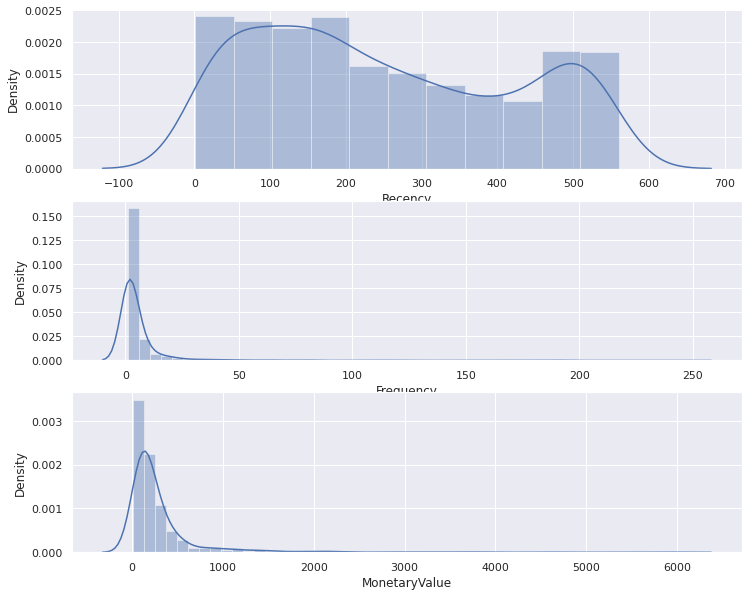

In [ ]:
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(data_process['Recency'])
# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(data_process['Frequency'])
# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(data_process['MonetaryValue'])
# Show the plot
plt.show()

On remarque une asymétrie dans les trois courbes de distribution.
Le nombre de clients récents, est supérieur à celui des anciens clients.
L'acquisition d'un nombre important de clients fidèles n'induit pas à une fréquence d'achat importante.

Dans notre base de données, nous pouvons voir que la majorité des clients n'achètent pas plus de 247 fois, les clients qui achètent plus que 50 fois sont considérés comme des valeurs aberrantes. la plupart des clients achetent de mois de 25 fois.



---



# Valeurs aberrantes

Text(0.5, 0, 'Attributes')

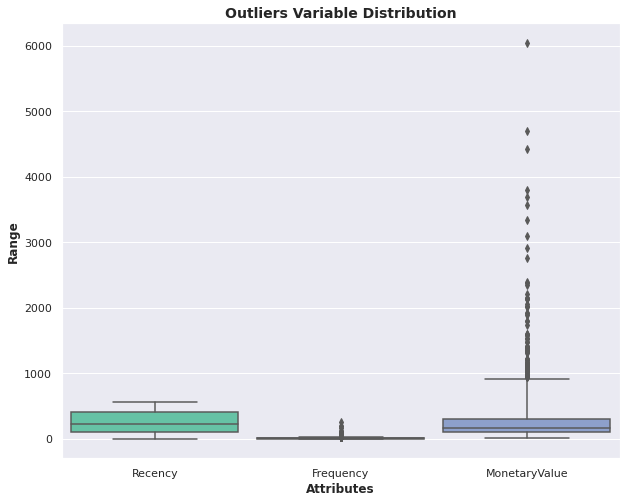

In [ ]:
attributes = ['Recency','Frequency','MonetaryValue']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = data_process[attributes], orient="v", palette="Set2" ,whis=3,saturation=1, width=0.9)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

# Correction des valeurs aberrantes

In [ ]:
rfm = data_process

In [ ]:
# Removing (statistical) outliers for Amount
Q1 = rfm.MonetaryValue.quantile(0.05)
Q3 = rfm.MonetaryValue.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.MonetaryValue >= Q1 - 1.5*IQR) & (rfm.MonetaryValue <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Recency
#Q1 = rfm.Recency.quantile(0.05)
#Q3 = rfm.Recency.quantile(0.95)
#IQR = Q3 - Q1
#rfm = rfm[(rfm.Recency >= Q1 - 1.5*IQR) & (rfm.Recency <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
#Q1 = rfm.Frequency.quantile(0.05)
#Q3 = rfm.Frequency.quantile(0.95)
#IQR = Q3 - Q1
#rfm = rfm[(rfm.Frequency >= Q1 - 1.5*IQR) & (rfm.Frequency <= Q3 + 1.5*IQR)]

In [ ]:
rfm_df = rfm[['Recency', 'Frequency', 'MonetaryValue']]

# Instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(1233, 3)

In [ ]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Recency', 'Frequency', 'Amount']
rfm_df_scaled.head()

,Recency,Frequency,Amount
0,-1.486288,-0.444235,-0.406605
1,-1.474466,-0.097417,-0.719089
2,-1.468555,-0.444235,-0.643211
3,-1.480377,-0.444235,-0.515652
4,-1.468555,-0.444235,-0.352231


Text(0.5, 0, 'Attributes')

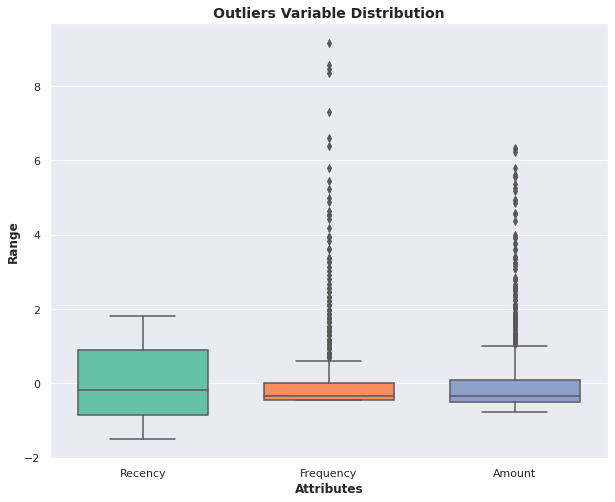

In [ ]:
attributes = ['Recency','Frequency','Amount']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = rfm_df_scaled[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')



---                       ---






## RFM quartile

In [ ]:
quantiles = data_process.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,MonetaryValue
0.25,107.0,1.0,100.635
0.50,219.0,2.0,158.180
0.75,401.0,5.0,304.360


In [ ]:
quantiles.to_dict()

{'Frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 5.0},
 'MonetaryValue': {0.25: 100.63499999999999, 0.5: 158.18, 0.75: 304.36},
 'Recency': {0.25: 107.0, 0.5: 219.0, 0.75: 401.0}}

### Création de segments RFM

In [ ]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

#create rfm segmentation table
rfm_segmentation = data_process
rfm_segmentation['R_Quartile'] = rfm_segmentation['Recency'].apply(RScore, args=('Recency',quantiles,))
rfm_segmentation['F_Quartile'] = rfm_segmentation['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
rfm_segmentation['M_Quartile'] = rfm_segmentation['MonetaryValue'].apply(FMScore, args=('MonetaryValue',quantiles,))
# RFM Score
rfm_segmentation['RFMScore'] = rfm_segmentation.R_Quartile.map(str) \
                            + rfm_segmentation.F_Quartile.map(str) \
                            + rfm_segmentation.M_Quartile.map(str)

  * Meilleur score de récence = 4
  * Meilleur score de fréquence = 4 
  * Meilleur score monétaire = 4 

In [ ]:
rfm_segmentation[rfm_segmentation['RFMScore']=='444'].sort_values('MonetaryValue', ascending=False).head(10)

,Recency,Frequency,MonetaryValue,R_Quartile,F_Quartile,M_Quartile,RFMScore
Customer id,,,,,,,
5401,3,191,6038.66,4,4,4,444
13219,12,64,4700.97,4,4,4,444
12290,25,190,4416.66,4,4,4,444
24505,9,120,3800.76,4,4,4,444
15956,53,114,3683.61,4,4,4,444
7609,52,75,3566.51,4,4,4,444
7044,25,247,3097.39,4,4,4,444
20487,73,106,2911.50,4,4,4,444
11350,77,45,2375.47,4,4,4,444


In [ ]:
print("Best Customers: ",len(rfm_segmentation[rfm_segmentation['RFMScore']=='444']))
print('Loyal Customers: ',len(rfm_segmentation[rfm_segmentation['F_Quartile']==4]))
print("Big Spenders: ",len(rfm_segmentation[rfm_segmentation['M_Quartile']==4]))
print('Almost Lost: ', len(rfm_segmentation[rfm_segmentation['RFMScore']=='244']))
print('Lost Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='144']))
print('Lost Cheap Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='111']))

Best Customers:  81
Loyal Customers:  274
Big Spenders:  304
Almost Lost:  36
Lost Customers:  10
Lost Cheap Customers:  68


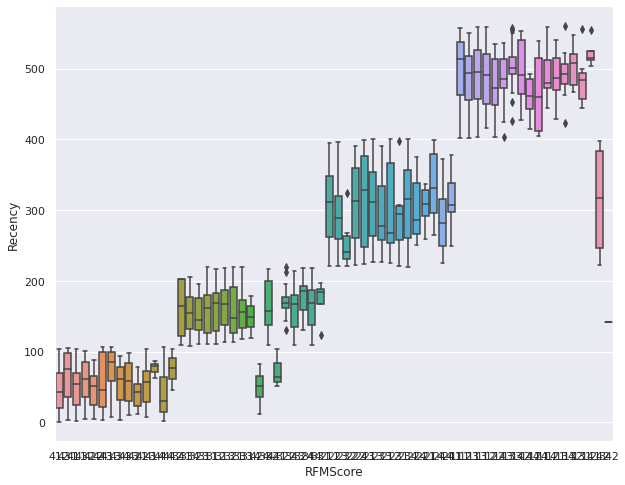

In [ ]:
sns.boxplot(x='RFMScore', y='Recency', data=rfm_segmentation)

Les segments clients sont déséquilibrés. Notre but est d'identifier des groupes de clients homogènes ayant des ressemblances par rapport à la recense, le revenu et la fréquence.

La méthode des quantiles permet de viser des combinaisons bien précises.
 par exemple le segment *Big Spenders*, représente uniquement les clients qui ont dépensé plus d'argent sans avoir recours à leurs fréquences ou bien à l'argent dépensé.



In [ ]:
Best_customers = rfm_segmentation[rfm_segmentation['RFMScore']=='444']
Loyal_customers = rfm_segmentation[rfm_segmentation['F_Quartile']==4]
Big_spenders = rfm_segmentation[rfm_segmentation['M_Quartile']==4]
Almost_lost = rfm_segmentation[rfm_segmentation['RFMScore']=='244']
Lost_customers = rfm_segmentation[rfm_segmentation['RFMScore']=='144']
Lost_cheap_customers = rfm_segmentation[rfm_segmentation['RFMScore']=='111']

## K-Means Clustering


Trouver le meilleur nombre de clusters
* Méthode du coude
* Silhouette

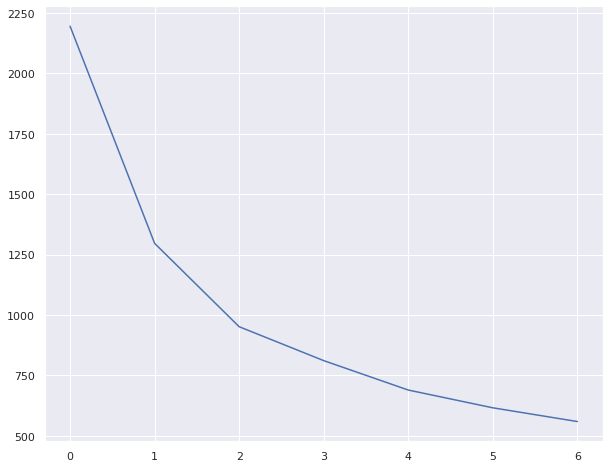

In [ ]:
######
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=5000)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd)

In [ ]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=5000)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.6637152952550298
For n_clusters=3, the silhouette score is 0.4739137152544374
For n_clusters=4, the silhouette score is 0.492516918688777
For n_clusters=5, the silhouette score is 0.38876766112655664
For n_clusters=6, the silhouette score is 0.3966747920600077
For n_clusters=7, the silhouette score is 0.40509566478608033
For n_clusters=8, the silhouette score is 0.4026073488740764


Fixing 3 clusters 

In [ ]:
rfm_kmeans_3 = data_process
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=5000)
kmeans.fit(rfm_kmeans_3)

# assign the label
rfm_kmeans_3['Cluster_Id'] = kmeans.labels_
rfm_kmeans_3.head()

,Recency,Frequency,MonetaryValue,R_Quartile,F_Quartile,M_Quartile,RFMScore,Cluster_Id
Customer id,,,,,,,,
1,1,1,134.55,4,1,2,412,0
6,3,4,30.07,4,3,1,431,0
8,4,1,55.44,4,1,1,411,0
9,2,1,98.09,4,1,1,411,0
10,4,1,152.73,4,1,2,412,0


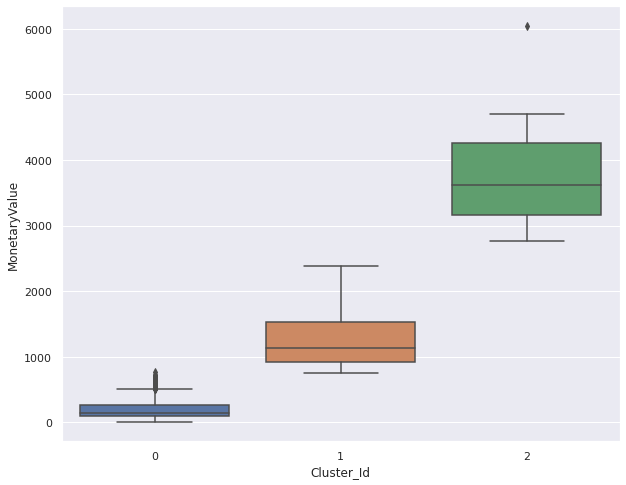

In [ ]:
sns.boxplot(x='Cluster_Id', y='MonetaryValue', data=rfm_kmeans_3)


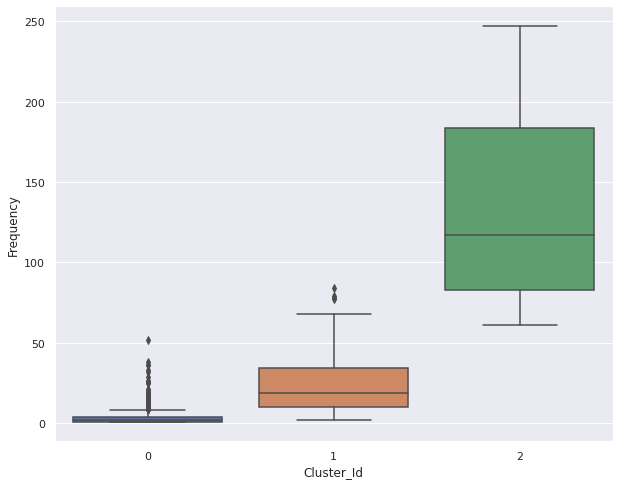

In [ ]:
sns.boxplot(x='Cluster_Id', y='Frequency', data=rfm_kmeans_3)

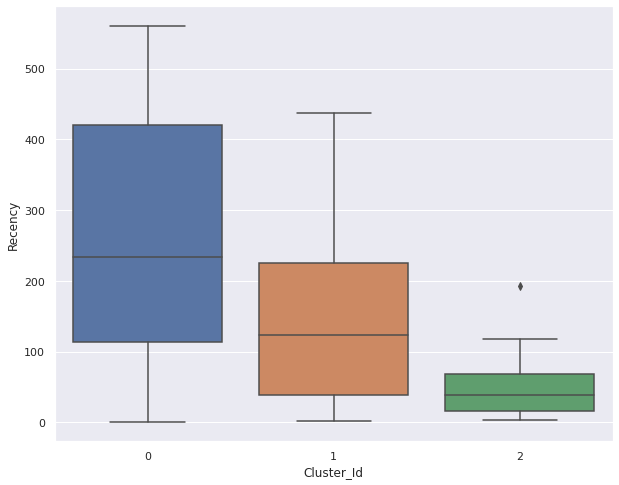

In [ ]:
sns.boxplot(x='Cluster_Id', y='Recency', data=rfm_kmeans_3)

------------------------

In [ ]:
rfm_kmeans_4 = data_process

# Final model with k=4
kmeans = KMeans(n_clusters=4, max_iter=5000)
kmeans.fit(rfm_kmeans_4)
#assign the label
rfm_kmeans_4['Cluster_Id'] = kmeans.labels_
rfm_kmeans_4.head()

#pickle.dump(kmeans, open("kmeans_4.pkl", 'wb')) #Saving the model

,Recency,Frequency,MonetaryValue,R_Quartile,F_Quartile,M_Quartile,RFMScore,Cluster_Id
Customer id,,,,,,,,
1,1,1,134.55,4,1,2,412,0
6,3,4,30.07,4,3,1,431,0
8,4,1,55.44,4,1,1,411,0
9,2,1,98.09,4,1,1,411,0
10,4,1,152.73,4,1,2,412,0


In [ ]:
from joblib import dump, load
import pickle

In [ ]:
kmeans = pickle.load(open("/kmeans_5.pkl", 'rb')) #To load saved model from local directory

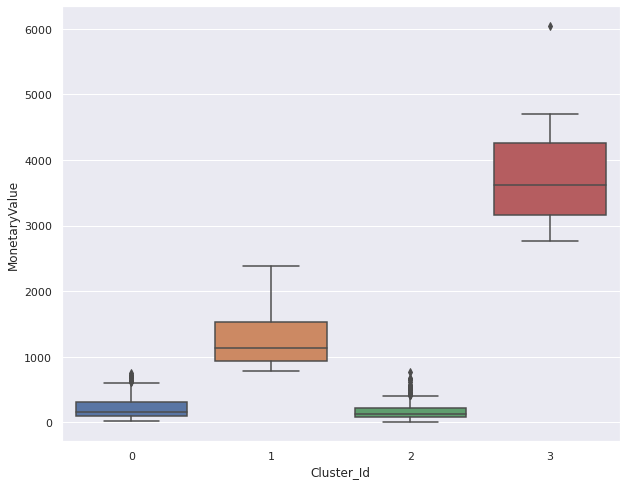

In [ ]:
sns.boxplot(x='Cluster_Id', y='MonetaryValue', data=rfm_kmeans_4)

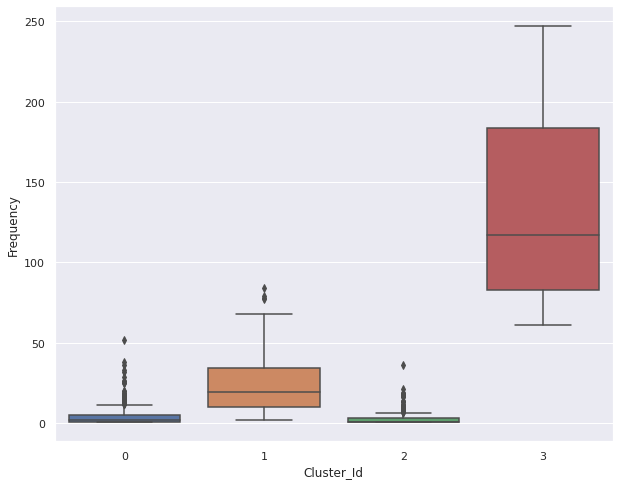

In [ ]:
sns.boxplot(x='Cluster_Id', y='Frequency', data=rfm_kmeans_4)

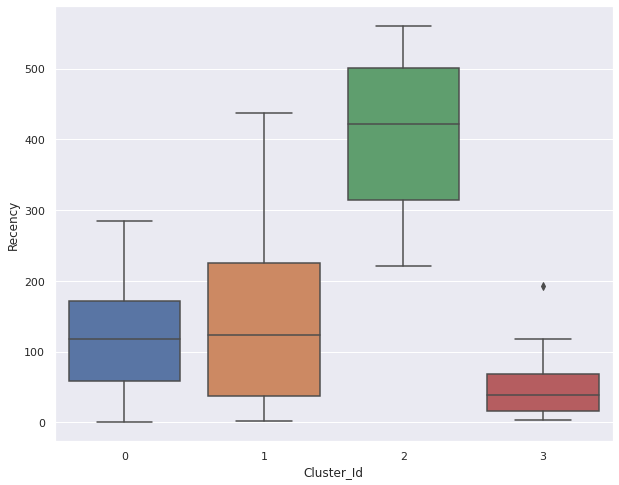

In [ ]:
sns.boxplot(x='Cluster_Id', y='Recency', data=rfm_kmeans_4)

Fixing 5 clusters 

In [ ]:
rfm_kmeans_5 = data_process

# Final model with k=5
#kmeans = KMeans(n_clusters=5, max_iter=200)
#kmeans.fit(rfm_kmeans_5)
kmeans = pickle.load(open("/kmeans_5.pkl", 'rb')) #To load saved model from local directory
# assign the label
rfm_kmeans_5['Cluster_Id'] = kmeans.labels_

In [ ]:
pickle.dump(kmeans, open("kmeans_5.pkl", 'wb')) #Saving the model

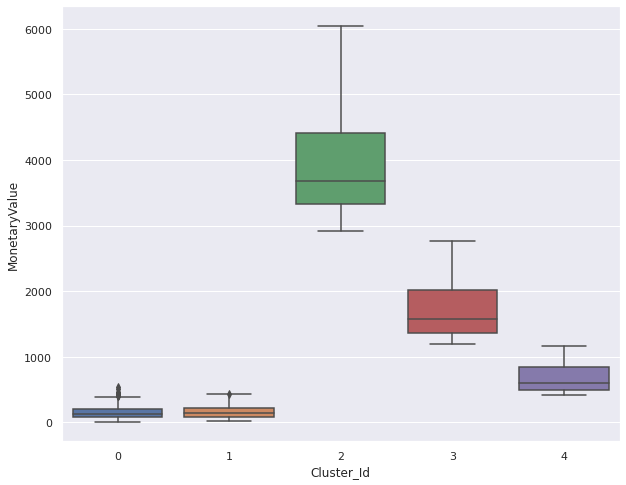

In [ ]:
sns.boxplot(x='Cluster_Id', y='MonetaryValue', data=rfm_kmeans_5)

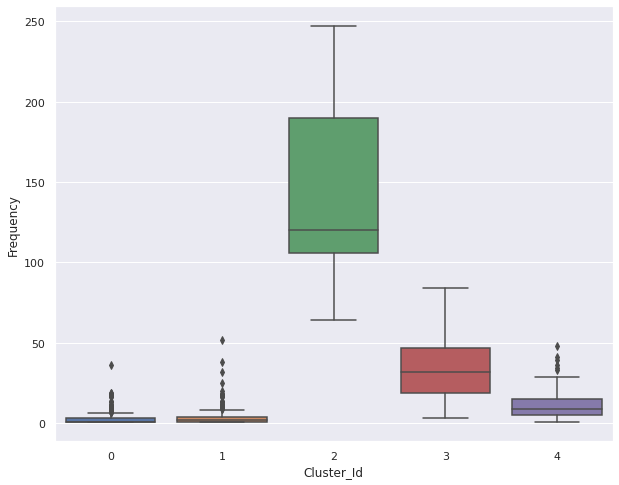

In [ ]:
sns.boxplot(x='Cluster_Id', y='Frequency', data=rfm_kmeans_5)

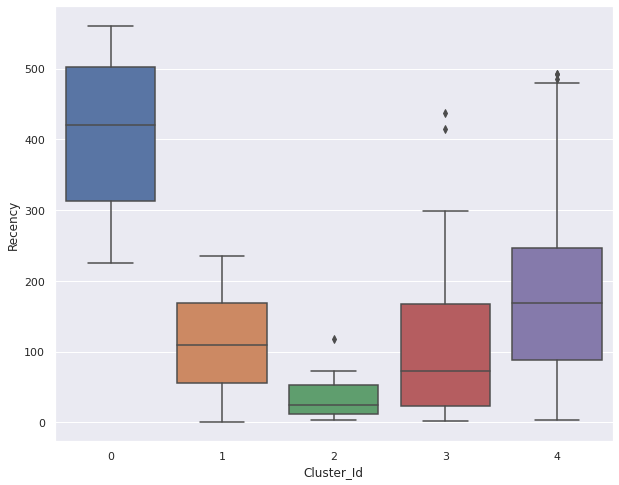

In [ ]:
sns.boxplot(x='Cluster_Id', y='Recency', data=rfm_kmeans_5)

Le choix du meilleur nombre de groupes de clients est basé sur le score de silhouette, on peut faire un découpage en deux, trois, quatre et cinq groupes.

Le découpage en deux et trois groupes n'offre pas un bon niveau de granularité.

On procède par un découpage en quatre groupes.

Groupe 1 (**Anciens clients perdus**): les anciens clients dont la fréquence d'achat et les dépenses sont très faibles, ce sont les clients à réacquérir vu qu'ils sont perdus depuis longtemps. Des emails et des messages offrant des réductions peuvent être envoyés afin de les reprendre à nouveau.
La création des offres sur mesure sera possible, vu qu'on dispose leurs historiques d'achats.

Groupe 2 (**clients récents à fort CA**): ils représentent les nouveaux clients qui ont effectué plusieurs achats récemment, ils forment un groupe de clients récents à fort CA. ce sont des clients à fidéliser par des emails qui proposent d'autres produits sur le site, vu qu'ils sont des nouveaux clients. Il est possible aussi de proposer des recommandations selon leurs derniers achats, de Mettre en place un programme de fidélisation et de proposer des réductions en frais de livraison.

Groupe 3 (**clients réguliers en développement**): des clients avec des dépenses et une fréquence d'achat moyennent par rapport aux autres clients, il faut augmenter la fréquence de leurs achats.
ce sont les clients réguliers en développement.
Il faut demander aux clients actuels satisfaits de laisser des avis positifs sur Internet. Les témoignages clients qui rassurez-les clients moins réguliers.
Le but est de lever les doutes des clients en développement et est un argumentaire solide. Il faut les rassurer et les convaincre : par rapport aux problèmes de livraison et la défaillance produite /services.
Les surprises ou réductions pour les nouveaux acheteurs sont toujours un bon moyen de les inciter à acheter. Le cadeau surprise peut être un produit complémentaire à l’achat ou tout simplement un échantillon gratuit adapté aux goûts du client. Du moment que le client ne s’y attend pas et que la surprise a de la valeur pour lui, il risque d’être ravi et de se sentir valorisé.

Groupe 4 (**nouveaux clients perdus**): ce sont des nouveaux clients perdus. Le ciblage des clients récents par les réseaux sociaux peut être efficace. on propose des recommandations sur instagram selon leurs derniers types d'achat.


à court terme, l'augmentation du chiffre d'affaires est lié à la fidélisation des clients récents à fort CA vu qu'il représente le groupe de clients qui dépense le plus.
Il faut viser aussi les clients réguliers en développement vu qu'ils sont actifs, il faut augmenter leurs fréquences d'achat.

à moyen terme, il faut suivre l'activité des nouveaux clients pour éviter leur partent. Il faut chercher à réattirer les clients perdus, vu que la réactivation d'un client perdu demande plus de temps.


******************************

# Customer Lifetime Value(CLTV)

Le CLTV est l’estimation du profit généré par un client pendant la durée de sa relation commerciale avec une entreprise
La Customer Lifetime Value est le montant moyen que vos clients dépenseront à travers votre entreprise pendant toute la durée de votre relation commerciale.

On propose de calculer le CLTV en ajoutant les bénéfices/revenus des clients dans un cycle donné.




CLTV peut également implémenter en utilisant les valeurs RFM (Récence, Fréquence, Monétaire). 

* CLTV = ((Valeur moyenne des commandes x Fréquence d'achat)/Taux de désabonnement) x Marge bénéficiaire.

Valeur client = valeur moyenne des commandes * fréquence d'achat

Valeur moyenne des commandes (AOV) = chiffre d'affaires total / nombre total de commandes. L'AOV représente le montant moyen des revenus que le client dépense pour une commande.

Fréquence d'achat = Nombre total de commandes / Nombre total de clients.

Il représente le nombre moyen de commandes passées par chaque client.

Taux de désabonnement : le taux de désabonnement est le pourcentage de clients qui n'ont pas commandé à nouveau.

Durée de vie du client = 1/ taux de désabonnement

In [ ]:
cltv_data = customers_B2C.groupby('Customer id').agg({'Created at': lambda x: (snapshot_date - x.max()).days,
                                        'Name': lambda num: len(num),
                                        'Lineitem quantity': lambda quant: quant.sum(),
                                        'Total Revenu': lambda price: price.sum()})

# Change the name of columns
cltv_data.columns = ['num_days','num_transactions','num_units','spent_money']
cltv_data.head()

,num_days,num_transactions,num_units,spent_money
Customer id,,,,
1,1,1,1,134.55
6,3,4,4,30.07
8,4,1,1,55.44
9,2,1,1,98.09
10,4,1,1,152.73


## Calcul du CLTV



CLTV = ((Valeur moyenne des commandes x Fréquence d'achat)/Taux de désabonnement) x Marge bénéficiaire.

Valeur client = valeur moyenne des commandes * fréquence d'achat

In [ ]:
# Average Order Value
cltv_data['avg_order_value'] = cltv_data['spent_money']/cltv_data['num_transactions']
cltv_data.head()

,num_days,num_transactions,num_units,spent_money,avg_order_value
Customer id,,,,,
1,1,1,1,134.55,134.5500
6,3,4,4,30.07,7.5175
8,4,1,1,55.44,55.4400
9,2,1,1,98.09,98.0900
10,4,1,1,152.73,152.7300


##  Fréquence d'achat

In [ ]:
purchase_frequency = sum(cltv_data['num_transactions'])/cltv_data.shape[0]
purchase_frequency

6.030564263322884

## Calculer le taux de rétention et le taux de désabonnement



In [ ]:
# Repeat Rate
repeat_rate= cltv_data[cltv_data.num_transactions > 1].shape[0]/cltv_data.shape[0]
#Churn Rate
churn_rate=1-repeat_rate
purchase_frequency,repeat_rate,churn_rate

(6.030564263322884, 0.5666144200626959, 0.4333855799373041)

## Marge bénéficiaire
Il représente le pourcentage des ventes totales gagné en tant que gain. 

In [ ]:
# Profit Margin
cltv_data['profit_margin'] = cltv_data['spent_money']*0.05
cltv_data.head()

,num_days,num_transactions,num_units,spent_money,avg_order_value,profit_margin
Customer id,,,,,,
1,1,1,1,134.55,134.5500,6.7275
6,3,4,4,30.07,7.5175,1.5035
8,4,1,1,55.44,55.4400,2.7720
9,2,1,1,98.09,98.0900,4.9045
10,4,1,1,152.73,152.7300,7.6365


## Customer Lifetime Value

In [ ]:
# Customer Value
cltv_data['CLV']=(cltv_data['avg_order_value']*purchase_frequency)/churn_rate

#Customer Lifetime Value
cltv_data['cust_lifetime_value']=cltv_data['CLV']*cltv_data['profit_margin']

cltv_data.head()

,num_days,num_transactions,num_units,spent_money,avg_order_value,profit_margin,CLV,cust_lifetime_value
Customer id,,,,,,,,
1,1,1,1,134.55,134.5500,6.7275,1872.264467,12595.659199
6,3,4,4,30.07,7.5175,1.5035,104.606080,157.275242
8,4,1,1,55.44,55.4400,2.7720,771.448101,2138.454137
9,2,1,1,98.09,98.0900,4.9045,1364.923237,6694.266015
10,4,1,1,152.73,152.7300,7.6365,2125.239331,16229.390151


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



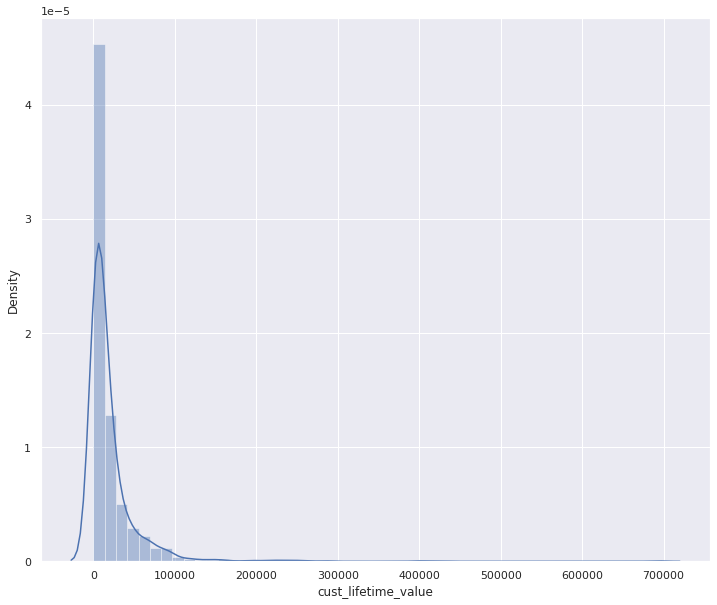

In [ ]:
plt.figure(figsize=(12,10))
# Plot distribution of R
sns.distplot(cltv_data['cust_lifetime_value'])

In [ ]:
cltv_final = cltv_data
cltv_final = cltv_final.sort_values(by="cust_lifetime_value", ascending=False)
cltv_final["segment"] = pd.qcut(cltv_final["cust_lifetime_value"], 4, labels=["D", "C", "B", "A"])


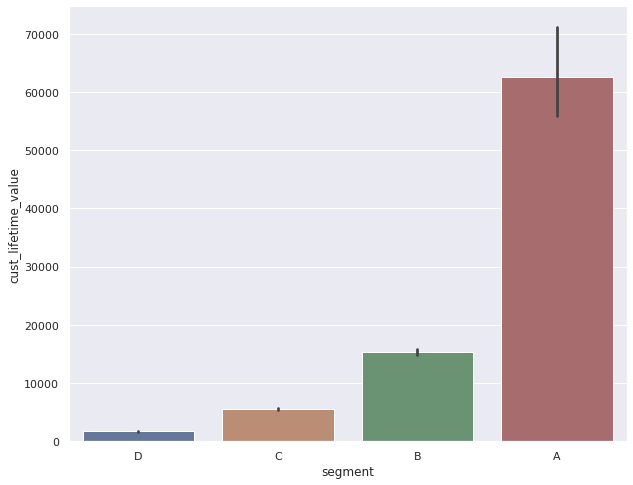

In [ ]:
ax = sns.barplot(x="segment", y="cust_lifetime_value", data=cltv_final,
                  saturation=.5)

In [ ]:
Segmentation of Scaled CLV Values


# Analyses prédictives


* Par exemple, si le client est associé à l'entreprise au cours de cette dernière année, nous pouvons additionner tous les bénéfices de cette années.
Nous pouvons faire la moyenne des bénéfices annuellement, semestriellement ou mensuellement, mais avec cette approche, nous pourrons construire un modèle prédictif pour les nouveaux clients.


* Un modèle de régression pour les clients existants est basé sur les données récentes sur les derniers mois comme variables indépendantes et le revenu total sur trois ans comme variable dépendante.

In [ ]:
cltv = customers_B2C[["Name", "Customer id", 'Lineitem quantity', 'Total Revenu', 'Created at']]

In [ ]:
# Change the name of columns
cltv['month_yr'] = cltv['Created at'].apply(lambda x: x.strftime('%b-%Y'))
cltv.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Name,Customer id,Lineitem quantity,Total Revenu,Created at,month_yr
0,#14442,1,1,134.55,2021-09-23 09:43:20+02:00,Sep-2021
85,#14426,5362,1,102.55,2021-09-21 19:30:01+02:00,Sep-2021
86,#14426,5362,1,0.00,2021-09-21 19:30:01+02:00,Sep-2021
87,#14425,7447,3,99.16,2021-09-21 19:22:38+02:00,Sep-2021
88,#14425,7447,8,0.00,2021-09-21 19:22:38+02:00,Sep-2021


In [ ]:
sale=cltv.pivot_table(index=['Customer id'],columns=['month_yr'],values='Total Revenu',aggfunc='sum',fill_value=0).reset_index()
sale.head()

month_yr,Customer id,Apr-2020,Apr-2021,Aug-2020,Aug-2021,Dec-2020,Feb-2021,Jan-2021,Jul-2020,Jul-2021,Jun-2020,Jun-2021,Mar-2020,Mar-2021,May-2020,May-2021,Nov-2020,Oct-2020,Sep-2020,Sep-2021
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,134.55
1,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.07
2,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.44
3,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98.09
4,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,152.73


In [ ]:
sale['CLV']=sale.iloc[:,2:].sum(axis=1)
sale.head()

month_yr,Customer id,Apr-2020,Apr-2021,Aug-2020,Aug-2021,Dec-2020,Feb-2021,Jan-2021,Jul-2020,Jul-2021,Jun-2020,Jun-2021,Mar-2020,Mar-2021,May-2020,May-2021,Nov-2020,Oct-2020,Sep-2020,Sep-2021,CLV
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,134.55,134.55
1,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.07,30.07
2,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.44,55.44
3,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98.09,98.09
4,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,152.73,152.73


### Selection des *Features*
Ici, nous devons diviser les colonnes données en deux types de variables dépendantes (ou variable cible) et de variable indépendante (ou variables caractéristiques). Sélectionnez les 6 derniers mois comme variable indépendante.

In [ ]:
X=sale[[	'Apr-2020'	,'Apr-2021'	,'Aug-2020',	'Aug-2021',	'Dec-2020'	,'Feb-2021'	,'Jan-2021'	,'Jul-2020',	'Jul-2021',	'Jun-2020',	'Jun-2021',	'Mar-2020',
	'Mar-2021',	'May-2020',	'May-2021',	'Nov-2020',	'Oct-2020',	'Sep-2020',	'Sep-2021'	]]
y=sale[['CLV']]

### Fractionnement des données
Pour comprendre les performances du modèle, diviser l'ensemble de données en un ensemble d'apprentissage et un ensemble de test est une bonne stratégie.

Nous devons passer 3 paramètres fonctionnalités, cible et taille de test_set. De plus, nous pouvons utiliser random_state comme valeur de départ pour maintenir la reproductibilité, ce qui signifie que chaque fois que nous divisons les données, cela n'affectera pas les résultats. De plus, si random_state est None, alors le générateur de nombres aléatoires utilise np.random pour sélectionner les enregistrements de manière aléatoire. Cela signifie que si nous ne plantons pas de graine, c'est différent à chaque fois.

In [ ]:
#split training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

In [ ]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

[-1.70530257e-13]
[[2.22375325e-15 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00]]


In [ ]:
from sklearn import metrics

# compute the R Square for model
print("R-Square:",metrics.r2_score(y_test, y_pred))

R-Square: 1.0


In [ ]:
# calculate MAE using scikit-learn
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))

#calculate mean squared error
print("MSE",metrics.mean_squared_error(y_test, y_pred))

# compute the RMSE of our predictions
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 2.4055661500398315e-13
MSE 1.5013934577528458e-25
RMSE: 3.8747818748322414e-13




---



# Analyse de l’impact et la corrélation des actions marketing 

In [ ]:
#Read customer2_events and customer1_events
customer2_events  = pd.read_json("/customer1_events - JSON.txt")
customer1_events  = pd.read_json("/customer2_events - JSON.txt")

l1 = list(customer1_events["event_properties"])
l2 = list(customer2_events["event_properties"])

result1 = json_normalize(l1,max_level=8)
result2 = json_normalize(l2,max_level=8)

customer_event1 =  pd.concat([customer1_events, result1], axis=1)
customer_event2 =  pd.concat([customer2_events, result2], axis=1)


customer_event1_colnames = pd.Index(customer_event1.columns)
customer_event2_colnames = pd.Index(customer_event2.columns)

#Comparing the two json data frames colname
common_cols = customer_event1_colnames.intersection(customer_event2_colnames)
not_common_cols = customer_event1_colnames.difference(customer_event2_colnames)

#concat the two data frames
customer_event = pd.concat([customer_event1,customer_event2], axis=0, ignore_index=True)
customer_event = customer_event.iloc[customer_event.astype(str).drop_duplicates().index]
#Drop columns having only Nan values
customer_event = customer_event.dropna(axis=1, how='all')
customer_event = customer_event.iloc[customer_event.astype(str).drop_duplicates().index]

In [ ]:
# listing not common columns
list(not_common_cols)

['$extra.customer.tax_exemptions',
 'HasPartialFulfillments',
 'Variant Option: Durata:']

In [ ]:
customer_event["$extra.name"].value_counts()

#13456    2
#13302    2
#12828    2
#13552    2
#14115    2
#13490    2
#11221    2
#10992    2
#13054    2
Name: $extra.name, dtype: int64

In [ ]:
customer_event["$extra.id"].value_counts()

3.246086e+12    2
3.913535e+12    2
3.681363e+12    2
3.784412e+12    2
2.382908e+12    2
3.730610e+12    2
3.764754e+12    2
2.450303e+12    2
3.771263e+12    2
Name: $extra.id, dtype: int64

In [ ]:
rfm4 = rfm_kmeans_4[['Recency', 'Frequency', 'MonetaryValue', 'Cluster_Id']]
rfm4['Customer id1'] = rfm4.index

orders_customers = pd.read_excel("/Orders _ customers.xlsx")
customers_B2C_tojoin = customers_B2C[["Name", "Customer id"]]


rfm4 = rfm4.join(customers_B2C_tojoin.set_index('Customer id'), on='Customer id')
rfm4 = rfm4.rename(columns={'Name':'$extra.name'})


#df.reset_index()
df1 = customer_event.join(rfm4.set_index('$extra.name'), on='$extra.name')
#df1 = df1.rename(columns={'Name':'$extra.name'})
#df1 = df1.drop_duplicates()
df1 = df1.iloc[df1.astype(str).drop_duplicates().index]
#df1 = df1.drop_duplicates()

df1 = df1[df1['$extra.name'].notna()]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df1["event_name"].value_counts()

Placed Order       20
Fulfilled Order    12
Cancelled Order     8
Name: event_name, dtype: int64

In [ ]:
customer_event_email_received = customer_event[customer_event["event_name"] == "Received Email" or customer_event["event_name"] == "Received Email"]
customer_event_email_received['$extra.name'].value_counts()

Series([], Name: $extra.name, dtype: int64)

On ne peut pas analyser l'impact des actions marketing par rapport aux groupes de clients segmenté, vu que les lignes contenant des lèvements comme (réception d'emails, ouverture des emails) ne sont pas menés par les identifiants des clients. la jointure entre les deux jeux de données *customer event et *Orders _ customers* nous donne une idée sur les actions d'achats qui sont analysées dans la première partie de notre analyse.

Pour pouvoir analyser l'impact des actions marketing sur le réachat il faut extraire les données des actions marketing accompagnées par les identifiants clients ou bien par les identifiants des achats.